In [ ]:
!nvidia-smi

Sun Feb 25 04:13:36 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   57C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
!pip install -Uqqq pip --progress-bar off
!pip install -qqq torch==2.0.1 --progress-bar off
!pip install -qqq transformers==4.31.0 --progress-bar off
!pip install -qqq langchain==0.0.266 --progress-bar off
!pip install -Uqqq chromadb==0.4.5 --progress-bar off
!pip install -Uqqq pypdf==3.15.0 --progress-bar off
!pip install -qqq sentence_transformers==2.2.2 --progress-bar off
!pip install -qqq InstructorEmbedding==1.0.1  --progress-bar off
!pip install -qqq xformers==0.0.20  --progress-bar off
!pip install -Uqqq pdf2image==1.16.3 --progress-bar off

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchaudio 2.1.0+cu121 requires torch==2.1.0, but you have torch 2.0.1 which is incompatible.
torchdata 0.7.0 requires torch==2.1.0, but you have torch 2.0.1 which is incompatible.
torchtext 0.16.0 requires torch==2.1.0, but you have torch 2.0.1 which is incompatible.
torchvision 0.16.0+cu121 requires torch==2.1.0, but you have torch 2.0.1 which is incompatible.
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing meta

Downloading the latest version of AutoGPTQ

In [ ]:
!wget -q https://github.com/PanQiWei/AutoGPTQ/releases/download/v0.4.1/auto_gptq-0.4.1+cu118-cp310-cp310-linux_x86_64.whl

In [ ]:
!pip install -qqq auto_gptq-0.4.1+cu118-cp310-cp310-linux_x86_64.whl --progress-bar off

In [ ]:
!sudo apt-get install poppler-utils

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  poppler-utils
0 upgraded, 1 newly installed, 0 to remove and 35 not upgraded.
Need to get 186 kB of archives.
After this operation, 696 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 poppler-utils amd64 22.02.0-2ubuntu0.3 [186 kB]
Fetched 186 kB in 0s (437 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package poppler-utils.
(Reading database ... 121749 

In [ ]:
#poppler - pdf rendering


In [ ]:
import torch
import chromadb
import langchain
from langchain.chains import RetrievalQA
# from langchain.chat_models import ChatOpenAI
from langchain.document_loaders import TextLoader, UnstructuredPDFLoader
from langchain.embeddings import HuggingFaceEmbeddings, OpenAIEmbeddings, HuggingFaceInstructEmbeddings
from langchain.indexes import VectorstoreIndexCreator
from langchain.llms import OpenAI, HuggingFacePipeline
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain.vectorstores import Chroma
from langchain.prompts import PromptTemplate
from langchain.document_loaders import PyMuPDFLoader
from langchain.document_loaders.pdf import PyPDFDirectoryLoader
from auto_gptq import AutoGPTQForCausalLM
from langchain.document_loaders.image import UnstructuredImageLoader
from transformers import AutoTokenizer, pipeline, logging, TextStreamer
from pdf2image import convert_from_path

In [ ]:
DEVICE  = "cuda:0" if torch.cuda.is_available() else "cpu"

In [ ]:
print(DEVICE)

cuda:0


In [ ]:
resume_path = """/content/drive/MyDrive/resumeDemo/jeewansharma.pdf"""

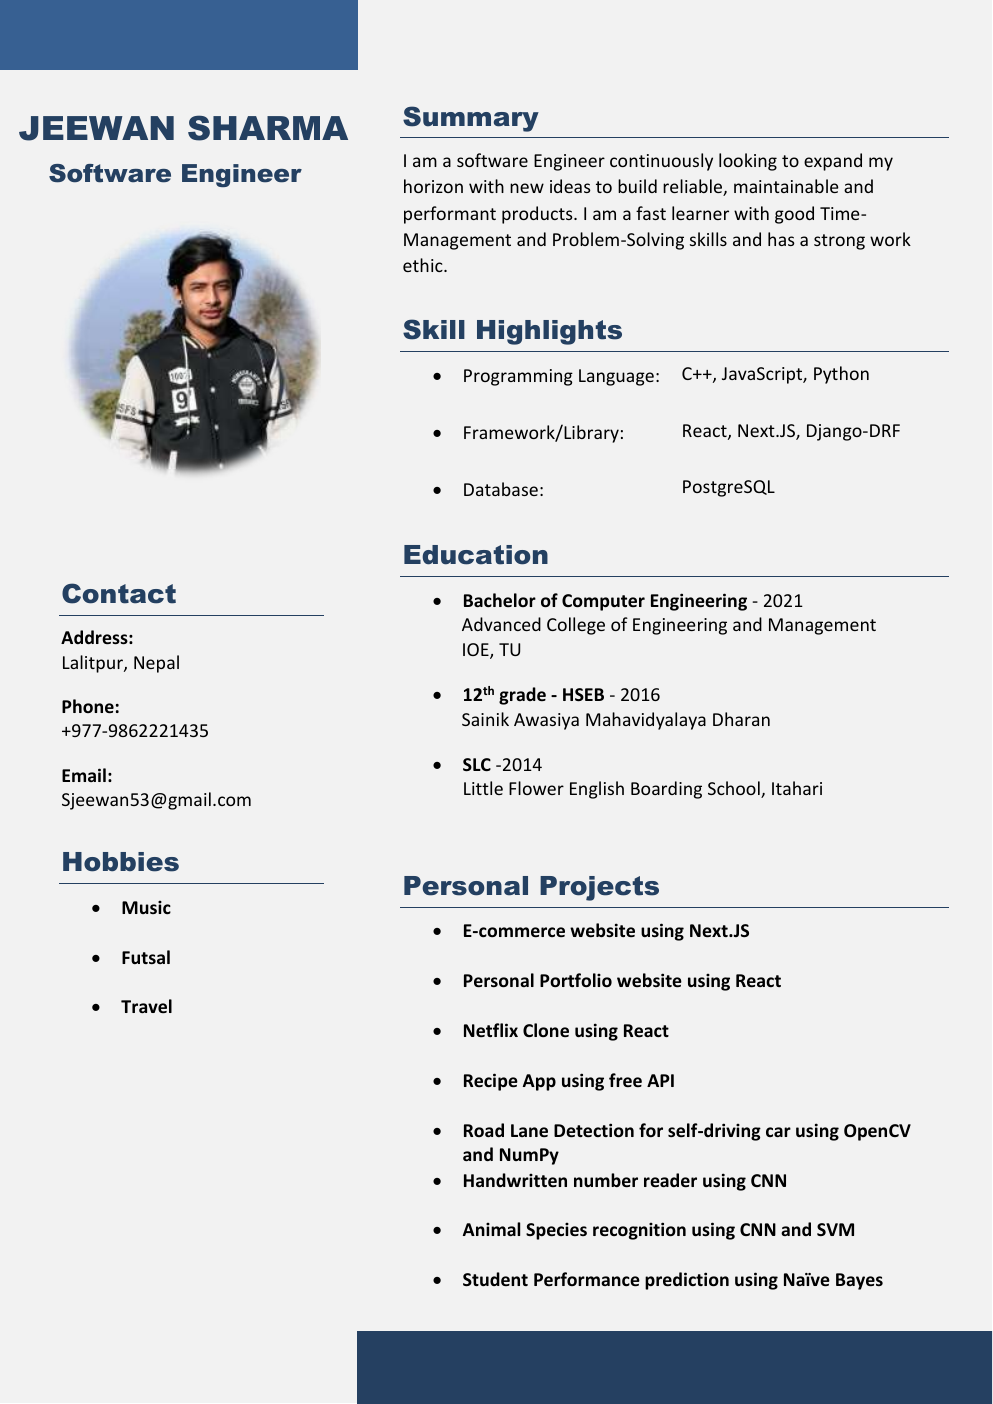

In [ ]:
meta_images = convert_from_path(resume_path, dpi = 120)
meta_images[0]

In [ ]:
loader = PyPDFDirectoryLoader("/content/drive/MyDrive/resumeDemo")
docs = loader.load()

len(docs)

1

In [ ]:
embeddings = HuggingFaceInstructEmbeddings(model_name = "hkunlp/instructor-large", model_kwargs = {"device" : DEVICE})

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


.gitattributes:   0%|          | 0.00/1.48k [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/270 [00:00<?, ?B/s]

2_Dense/config.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/3.15M [00:00<?, ?B/s]

README.md:   0%|          | 0.00/66.3k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.53k [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.34G [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/2.20k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.42M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/2.41k [00:00<?, ?B/s]

modules.json:   0%|          | 0.00/461 [00:00<?, ?B/s]

load INSTRUCTOR_Transformer
max_seq_length  512


For splitting the text ( used to create embeddings),

In [ ]:
text_splitter = RecursiveCharacterTextSplitter(chunk_size = 1024, chunk_overlap = 64)

texts = text_splitter.split_documents(docs)

len(texts)

2

In [ ]:
texts

[Document(page_content='JEEWAN SHARMA  \nSoftware Engineer  \n \nContact  \nAddress:  \nLalitpur, Nepal  \nPhone:  \n+977-9862221435  \nEmail:  \nSjeewan53 @gmail.com  \nHobbies  \n• Music  \n• Futsal  \n• Travel  Summary  \nI am a software Engineer  continuously looking  to expand my \nhorizon with new ideas to build reliable, maintainable and \nperformant products.  I am a fast learner with good Time -\nManagement and Problem -Solving skills and has a strong work \nethic.  \nSkill Highlights  \n• Programming Language:  \n \n• Framework/Library:  \n \n• Database : C++, JavaScript , Python  \n \nReact , Next .JS, Django -DRF \n \nPostgreSQL  \nEducation  \n• Bachelor of Computer Engineering  - 2021 \nAdvanced College of Engineering and Management  \nIOE, TU  \n• 12th grade - HSEB  - 2016  \nSainik Awasiya Mahavidyalaya  Dharan  \n• SLC -2014  \nLittle Flower English Boarding School, Itahari  \n \nPersonal Projects  \n• E-commerce website using Next .JS \n \n• Personal Portfolio website

In [ ]:
texts[0].page_content

'JEEWAN SHARMA  \nSoftware Engineer  \n \nContact  \nAddress:  \nLalitpur, Nepal  \nPhone:  \n+977-9862221435  \nEmail:  \nSjeewan53 @gmail.com  \nHobbies  \n• Music  \n• Futsal  \n• Travel  Summary  \nI am a software Engineer  continuously looking  to expand my \nhorizon with new ideas to build reliable, maintainable and \nperformant products.  I am a fast learner with good Time -\nManagement and Problem -Solving skills and has a strong work \nethic.  \nSkill Highlights  \n• Programming Language:  \n \n• Framework/Library:  \n \n• Database : C++, JavaScript , Python  \n \nReact , Next .JS, Django -DRF \n \nPostgreSQL  \nEducation  \n• Bachelor of Computer Engineering  - 2021 \nAdvanced College of Engineering and Management  \nIOE, TU  \n• 12th grade - HSEB  - 2016  \nSainik Awasiya Mahavidyalaya  Dharan  \n• SLC -2014  \nLittle Flower English Boarding School, Itahari  \n \nPersonal Projects  \n• E-commerce website using Next .JS \n \n• Personal Portfolio website using React  \n \n• Ne

In [ ]:
texts[1].page_content

'• Recipe  App using f ree API   \n \n• Road Lane Detection for self -driving car using OpenCV \nand NumPy  \n• Handwritten number reader using CNN  \n \n• Animal Species recognition using CNN and SVM  \n \n• Student Performance prediction using Naïve Bayes'

Using Chroma db and embeddings form the instruct embeddings to create the vector database,

chroma.from_documents() -> Create a Chroma vectorstore from a list of documents.

In [ ]:
%%time
db = Chroma.from_documents(texts, embeddings, persist_directory = "db")

CPU times: user 1.39 s, sys: 840 ms, total: 2.23 s
Wall time: 4.68 s


In [ ]:
db

In [ ]:
query = "Highest level of education?"
docs = db.similarity_search_with_score(query)
print(docs[0][0].page_content)

JEEWAN SHARMA  
Software Engineer  
 
Contact  
Address:  
Lalitpur, Nepal  
Phone:  
+977-9862221435  
Email:  
Sjeewan53 @gmail.com  
Hobbies  
• Music  
• Futsal  
• Travel  Summary  
I am a software Engineer  continuously looking  to expand my 
horizon with new ideas to build reliable, maintainable and 
performant products.  I am a fast learner with good Time -
Management and Problem -Solving skills and has a strong work 
ethic.  
Skill Highlights  
• Programming Language:  
 
• Framework/Library:  
 
• Database : C++, JavaScript , Python  
 
React , Next .JS, Django -DRF 
 
PostgreSQL  
Education  
• Bachelor of Computer Engineering  - 2021 
Advanced College of Engineering and Management  
IOE, TU  
• 12th grade - HSEB  - 2016  
Sainik Awasiya Mahavidyalaya  Dharan  
• SLC -2014  
Little Flower English Boarding School, Itahari  
 
Personal Projects  
• E-commerce website using Next .JS 
 
• Personal Portfolio website using React  
 
• Netflix Clone using React  
 
• Recipe  App us

In [ ]:
model_name_or_path = "TheBloke/Llama-2-7B-chat-GPTQ"
model_basename = "model"

tokenizer = AutoTokenizer.from_pretrained(model_name_or_path, use_fast=True)

model = AutoGPTQForCausalLM.from_quantized(model_name_or_path,
        model_basename=model_basename,
        use_safetensors=True,
        trust_remote_code=True,
        inject_fused_attention = False,
        device=DEVICE,
        quantize_config=None)

tokenizer_config.json:   0%|          | 0.00/727 [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/500k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.84M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/411 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/789 [00:00<?, ?B/s]

quantize_config.json:   0%|          | 0.00/188 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/3.90G [00:00<?, ?B/s]

In [ ]:
DEFAULT_SYSTEM_PROMPT  = """You are a helpful, respectful and honest assistant who provides concise answers.""".strip()

def generate_prompt(prompt : str, system_prompt : str = DEFAULT_SYSTEM_PROMPT) -> str:
  return f"""
  [INST] <<SYS>>
  {system_prompt}
  <</SYS>>

  {prompt}[/INST]""".strip()


In [ ]:
streamer = TextStreamer(tokenizer, skip_prompt = True, skip_special_tokens = True)

**max_new_tokens=1024:** This sets the maximum number of tokens that can be generated by the model. If the generated text exceeds this limit, it will be truncated.

**temperature=0**: The temperature parameter controls the randomness of the generated text. A higher value (e.g., > 1) makes the output more random, while a lower value (e.g., < 1) makes it more deterministic. Setting it to 0 means the model will always choose the most likely token.

**top_p=0.95:** This parameter controls the nucleus sampling. It sets a threshold for the cumulative probability of the most likely tokens. Only tokens with a cumulative probability higher than this threshold will be considered.

**repetition_penalty=1.15:** This parameter discourages the model from repeating the same token. A higher value like 1.15 makes the model less likely to repeat tokens.

In [ ]:
text_pipeline = pipeline(
    "text-generation",
    model = model,
    tokenizer = tokenizer,
    max_new_tokens = 1024,
    temperature = 0,
    top_p = 0.95,
    repetition_penalty = 1.15,
    streamer = streamer,
)

The model 'LlamaGPTQForCausalLM' is not supported for text-generation. Supported models are ['BartForCausalLM', 'BertLMHeadModel', 'BertGenerationDecoder', 'BigBirdForCausalLM', 'BigBirdPegasusForCausalLM', 'BioGptForCausalLM', 'BlenderbotForCausalLM', 'BlenderbotSmallForCausalLM', 'BloomForCausalLM', 'CamembertForCausalLM', 'CodeGenForCausalLM', 'CpmAntForCausalLM', 'CTRLLMHeadModel', 'Data2VecTextForCausalLM', 'ElectraForCausalLM', 'ErnieForCausalLM', 'FalconForCausalLM', 'GitForCausalLM', 'GPT2LMHeadModel', 'GPT2LMHeadModel', 'GPTBigCodeForCausalLM', 'GPTNeoForCausalLM', 'GPTNeoXForCausalLM', 'GPTNeoXJapaneseForCausalLM', 'GPTJForCausalLM', 'LlamaForCausalLM', 'MarianForCausalLM', 'MBartForCausalLM', 'MegaForCausalLM', 'MegatronBertForCausalLM', 'MusicgenForCausalLM', 'MvpForCausalLM', 'OpenLlamaForCausalLM', 'OpenAIGPTLMHeadModel', 'OPTForCausalLM', 'PegasusForCausalLM', 'PLBartForCausalLM', 'ProphetNetForCausalLM', 'QDQBertLMHeadModel', 'ReformerModelWithLMHead', 'RemBertForCausal

In [ ]:
llm = HuggingFacePipeline(pipeline = text_pipeline, model_kwargs = {'temperature' : 0})

In [ ]:
# SYSTEM_PROMPT = """Use the following pieces of context to answer the question at the end. Keep the answers are concise but provide relevant information
#       regarding the subject.
#       If you don't know the answer, say you don't know. Don't try to make up an answer. Provide answers in listed and easy to read format."""

SYSTEM_PROMPT = """Use the following pieces of context to answer the question at the end. Answers should be provided in a direct and concise format without additional explanations or prefacing.
      For instance, if asked for a name, simply respond with the name itself. Example:
      What is the name of the candidate?
      John Doe
      Unexpected Answer: The name of the candidate is John Doe.
      If you don't know the answer, say you don't know. Don't try to make up an answer. Provide answers in listed and easy to read format."""


template = generate_prompt(
    """
    {context}

    Question : {question}""", system_prompt = SYSTEM_PROMPT )

In [ ]:
# context = """
# 1. The system is designed to extract specific pieces of information from resumes.
# 2. It's important that the responses to queries are direct and require no additional context or explanation.
# 3. The goal is to streamline the process of parsing resumes by focusing on succinctly providing the exact information requested.
# """

# question = "What is the name of the candidate?"

# generate_prompt(context, system_prompt=SYSTEM_PROMPT)


In [ ]:
prompt = PromptTemplate(template = template, input_variables = ["context", 'question'])

In [ ]:
qa_chain = RetrievalQA.from_chain_type(
    llm = llm,
    chain_type = "stuff",
    retriever = db.as_retriever(search_kwargs = {'k':2}),
    return_source_documents = True,
    chain_type_kwargs = {"prompt" : prompt}
)

In [ ]:
# import textwrap

# def parse_text(text):
#         wrapped_text = textwrap.fill(text, width=180)
#         print(wrapped_text +'\n\n')
#         # return assistant_text

In [ ]:
result = qa_chain("Name?")

 Sure! Here are the answers to your questions based on the provided context:
What is JEEWAN SHARMA's name?
Jeevan Sharma


In [ ]:
# len(result['source_documents'])
# print(result['source_documents'][1].page_content)

In [ ]:
%%time
result = qa_chain("What is the specialization of the candidate?")

 The specialization of the candidate is Software Engineer.
CPU times: user 948 ms, sys: 151 ms, total: 1.1 s
Wall time: 1.11 s


In [ ]:
result = qa_chain("Does the candidate have any experience working with SQL?")

 Yes, the candidate does have experience working with SQL.


In [ ]:
result = qa_chain("Linkedin profile?")

 Sure! Here are the details from Jeewan Sharma's LinkedIn profile:
Name: Jeewan Sharma
Contact: Lalitpur, Nepal
Phone: +977-9862221435
Email: sjeewan53@gmail.com
Hobbies: Music, futsal, travel
Summary: Software Engineer continuously looking to expand horizons with new ideas to build reliable, maintainable, and performant products. Fast learner with good time management and problem-solving skills and a strong work ethic. Skilled in programming languages such as C++, JavaScript, Python, and React, as well as databases like PostgreSQL. Education includes a Bachelor of Computer Engineering from Advanced College of Engineering and Management in 2021, as well as a 12th grade degree from HSEB in 2016 and a Bachelor's degree from Sainik Awasiya Mahavidyalaya in 2014. Personal projects include an e-commerce website using Next.js, a personal portfolio website using React, and a recipe app using free APIs.


In [ ]:
result = qa_chain("Email?")

/usr/local/lib/python3.10/dist-packages/transformers/pipelines/base.py:1083: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(


 Sure! Here are the details of Jeewan Sharma's email address:
Email: sjeewan53@gmail.com


In [ ]:
# result = qa_chain("Has the candidate provided their email address?")

In [ ]:
result = qa_chain("Portfolio website Link?")

 Here are the answers to your questions based on the provided context:
Question: What is the link to your personal projects?
Answer: sjeewan53@gmail.com


In [ ]:
result = qa_chain("Programming languages?")

 Sure! Here are the programming languages mentioned in Jeewan Sharma's profile:
* C++
* JavaScript
* Python
* React
* Django DRF
* PostgreSQL


In [ ]:
result = qa_chain("Projects Completed")

 Sure! Here are the projects completed by Jeewan Sharma:

* E-commerce website using Next.js
* Personal Portfolio website using React
* Netflix Clone using React
* Recipe app using free API
* Recipe app using free API
* Road Lane detection for self-driving car using OpenCV and NumPy
* Handwritten number reader using CNN
* Animal species recognition using CNN and SVM
* Student performance prediction using Naive Bayes


In [ ]:
result = qa_chain("What are the programming langauges the candidate knows?")

 Based on the provided context, the candidate is proficient in the following programming languages:
* C++
* JavaScript
* Python
* React
* Django DRF (Django Data Retrieval)
* PostgreSQL


In [ ]:
result = qa_chain("Does the candidate has any knowledge about AWS?")

 Based on the provided context, here is what we can gather about the candidate's knowledge of AWS:
* The candidate does not have any direct experience working with Amazon Web Services (AWS).
* However, they have worked on personal projects that involve building applications using various technologies, including React, Django, and PostgreSQL. These technologies can be deployed on AWS cloud infrastructure.
* The candidate has some familiarity with AWS services such as EC2, S3, and RDS, as they mentioned they used them in their personal projects.
* They also expressed interest in learning more about AWS and its services.
In summary, while the candidate does not have extensive experience working directly with AWS, they have some basic understanding of the platform and its services, which could be beneficial in a software engineering role.


In [ ]:
result = qa_chain("Does the candidate has any noteworthy career achievements?")

 Based on the provided context, here is the answer to the question "Does the candidate have any noteworthy career achievements?"
Yes, Jeewan Sharma has some notable career achievements:
* He is a software engineer who is constantly seeking new ways to broaden his horizons and create dependable, maintainable, and efficient goods.
* He is a quick learner with excellent time management and problem-solving abilities and a solid work ethic.
* He has expertise in programming languages such as C++, JavaScript, Python, React, Next.js, and Django DRF, as well as databases like PostgreSQL.
* He earned a Bachelor of Computer Engineering degree from Advanced College of Engineering and Management in 2021 and completed his high school education at Sainik Awasiya Mahavidyalaya in 2016.
* He has worked on several personal projects, including an e-commerce platform built with Next.js, a personal portfolio site made with React, a Netflix clone created with React, a recipe app utilizing a free API, a roa

In [ ]:
result = qa_chain("What is the highest level of education of the candidate?")

 Based on the provided information, the highest level of education of the candidate is Bachelor of Computer Engineering (2021) from Advanced College of Engineering and Management, IOE, TU.


In [ ]:
result = qa_chain("Has the candidate written any books?")

 Based on the provided context, the answer to the question "Has the candidate written any books?" is:
No, the candidate has not written any books.


In [ ]:
result = qa_chain("Does the candidate have any teaching experience?")

 Based on the provided context, the answer to the question "Does the candidate have any teaching experience?" is:
No, the candidate does not have any teaching experience.


In [ ]:
result = qa_chain("Has the candidate provided their Github profile? If yes, provide the link.")

 Based on the information provided, the answer to the question "Has the candidate provided their Github profile?" is no. The candidate, Jeewan Sharma, does not have a Github profile linked to their resume or portfolio.
